In [1]:
import tensorflow as tf

In [2]:
# importing CIFAR datasets from keras

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

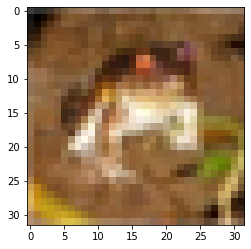

In [4]:
import  matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [5]:
y_train[0]

array([6], dtype=uint8)

##**Processing the data**

In [6]:
x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [7]:
x_train.astype("float32")
x_test.astype("float32")

array([[[[158., 112.,  49.],
         [159., 111.,  47.],
         [165., 116.,  51.],
         ...,
         [137.,  95.,  36.],
         [126.,  91.,  36.],
         [116.,  85.,  33.]],

        [[152., 112.,  51.],
         [151., 110.,  40.],
         [159., 114.,  45.],
         ...,
         [136.,  95.,  31.],
         [125.,  91.,  32.],
         [119.,  88.,  34.]],

        [[151., 110.,  47.],
         [151., 109.,  33.],
         [158., 111.,  36.],
         ...,
         [139.,  98.,  34.],
         [130.,  95.,  34.],
         [120.,  89.,  33.]],

        ...,

        [[ 68., 124., 177.],
         [ 42., 100., 148.],
         [ 31.,  88., 137.],
         ...,
         [ 38.,  97., 146.],
         [ 13.,  64., 108.],
         [ 40.,  85., 127.]],

        [[ 61., 116., 168.],
         [ 49., 102., 148.],
         [ 35.,  85., 132.],
         ...,
         [ 26.,  82., 130.],
         [ 29.,  82., 126.],
         [ 20.,  64., 107.]],

        [[ 54., 107., 160.],
       

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

##**Converting the y values to categories**

In [9]:
number_classes = 10

In [10]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, number_classes)

y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_test = tf.keras.utils.to_categorical(y_test, number_classes)

y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

##**Normalizing the x train and x test**

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
# Building the Model

import tensorflow as tf
from tensorflow.keras import layers


inputs = layers.Input(shape=(32,32,3))

x = layers.Conv2D(filters= 32, kernel_size= 3, activation= "relu")(inputs)
x = layers.Conv2D(filters= 32, kernel_size= 3, activation= "relu")(x)
x = layers.MaxPool2D(pool_size= 2)(x)
x = layers.Dropout(0.3)(x)

x= layers.Conv2D(filters= 64, kernel_size= 3, activation= "relu")(x)
x = layers.Conv2D(filters = 64, kernel_size= 3, activation= "relu")(x)
x = layers.MaxPool2D(pool_size= 2)(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)

x = layers.Dense(1100, activation= "relu")(x)
x = layers.Dropout(.3)(x)
x = layers.Dense(1100, activation= "relu")(x)

outputs = layers.Dense(number_classes, activation= "softmax")(x)

model = tf.keras.Model(inputs, outputs)

# Compiling the Model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy, 
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

# fitting data to the model

model.fit(x_train,y_train,
          epochs = 100,
          validation_data = (x_test,y_test)
        )



Epoch 1/100
1563/1563 [==============================] - 31s 11ms/step - loss: 1.5508 - accuracy: 0.4284 - val_loss: 1.2656 - val_accuracy: 0.5403
Epoch 2/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1881 - accuracy: 0.5777 - val_loss: 1.0197 - val_accuracy: 0.6444
Epoch 3/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0450 - accuracy: 0.6320 - val_loss: 0.9564 - val_accuracy: 0.6642
Epoch 4/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9416 - accuracy: 0.6672 - val_loss: 0.8675 - val_accuracy: 0.6949
Epoch 5/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8628 - accuracy: 0.6934 - val_loss: 0.8278 - val_accuracy: 0.7156
Epoch 6/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8114 - accuracy: 0.7166 - val_loss: 0.8128 - val_accuracy: 0.7204
Epoch 7/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7641 - accuracy: 0.7306 - val_loss: 0

In [19]:
model_evaluation = model.evaluate(x_test,y_test)

print(f"Model Accuracy: {model_evaluation[1] * 100: 0.2f}%")

313/313 [==============================] - 2s 6ms/step - loss: 0.7921 - accuracy: 0.7789
Model Accuracy:  77.89%


In [21]:
y_predict = model.predict(x_test)

In [30]:
y_pre = tf.squeeze(tf.round(y_predict))
y_pre

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)>

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.84      0.75      0.80      1000
           1       0.94      0.84      0.89      1000
           2       0.76      0.64      0.69      1000
           3       0.66      0.52      0.58      1000
           4       0.78      0.75      0.77      1000
           5       0.76      0.65      0.70      1000
           6       0.77      0.87      0.82      1000
           7       0.84      0.81      0.83      1000
           8       0.92      0.81      0.86      1000
           9       0.87      0.85      0.86      1000

   micro avg       0.82      0.75      0.78     10000
   macro avg       0.81      0.75      0.78     10000
weighted avg       0.81      0.75      0.78     10000
 samples avg       0.75      0.75      0.75     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
